In [106]:
import pandas as pd
import numpy as np
import sklearn as sk
import hashlib
%matplotlib inline
import matplotlib.pyplot as plt

#aids = pd.read_csv("C:/Users/julia/OneDrive/Documents/Hackathon/AIDS.csv")
aids = pd.read_csv('data/hiv-clt-zipcode.csv', index_col='zip')

In [107]:
aids

,city,num_ppl_with_hiv_13to24,num_ppl_with_hiv_25to44,num_ppl_with_hiv_45to59,num_ppl_with_hiv_60plus,num_ppl_with_hiv_asian,num_ppl_with_hiv_black,num_ppl_with_hiv,num_ppl_with_hiv_female,num_ppl_with_hiv_hispanic,...,rate_ppl_with_hiv_per_100k_60plus,rate_ppl_with_hiv_per_100k_asian,rate_ppl_with_hiv_per_100k_black,rate_ppl_with_hiv_per_100k,rate_denominator,year,rate_ppl_with_hiv_per_100k_female,rate_ppl_with_hiv_per_100k_hispanic,rate_ppl_with_hiv_per_100k_male,rate_ppl_with_hiv_per_100k_white
zip,,,,,,,,,,,,,,,,,,,,,
28206,Charlotte,17.0,101,185,51.0,NaN,314.0,354,121.0,7.0,...,3564.0,NaN,4388.0,3698,100000,2016,2577.0,768.0,4777,1542
28214,Charlotte,14.0,110,80,18.0,NaN,160.0,222,61.0,16.0,...,424.0,NaN,1542.0,807,100000,2016,423.0,592.0,1229,247
28212,Charlotte,25.0,203,152,49.0,13.0,304.0,429,108.0,37.0,...,1182.0,1104.0,2348.0,1419,100000,2016,683.0,493.0,2226,739
28205,Charlotte,22.0,216,271,86.0,5.0,370.0,595,143.0,43.0,...,1690.0,287.0,3203.0,1648,100000,2016,796.0,671.0,2494,1035
28208,Charlotte,21.0,258,335,112.0,NaN,626.0,726,266.0,17.0,...,2498.0,NaN,3211.0,2680,100000,2016,1846.0,896.0,3627,1425
28216,Charlotte,29.0,197,263,78.0,NaN,462.0,567,171.0,19.0,...,1245.0,NaN,1935.0,1493,100000,2016,824.0,739.0,2299,622
28215,Charlotte,26.0,208,187,51.0,NaN,374.0,472,141.0,40.0,...,771.0,NaN,1778.0,1114,100000,2016,623.0,593.0,1676,321
28269,Charlotte,9.0,172,170,54.0,NaN,312.0,405,121.0,15.0,...,775.0,NaN,1332.0,720,100000,2016,407.0,316.0,1071,259
28217,Charlotte,14.0,111,110,27.0,NaN,193.0,262,69.0,27.0,...,1036.0,NaN,2100.0,1346,100000,2016,710.0,500.0,1981,737


In [108]:
aids.describe()

,num_ppl_with_hiv_13to24,num_ppl_with_hiv_25to44,num_ppl_with_hiv_45to59,num_ppl_with_hiv_60plus,num_ppl_with_hiv_asian,num_ppl_with_hiv_black,num_ppl_with_hiv,num_ppl_with_hiv_female,num_ppl_with_hiv_hispanic,num_ppl_with_hiv_male,...,rate_ppl_with_hiv_per_100k_60plus,rate_ppl_with_hiv_per_100k_asian,rate_ppl_with_hiv_per_100k_black,rate_ppl_with_hiv_per_100k,rate_denominator,year,rate_ppl_with_hiv_per_100k_female,rate_ppl_with_hiv_per_100k_hispanic,rate_ppl_with_hiv_per_100k_male,rate_ppl_with_hiv_per_100k_white
count,19.000000,29.000000,29.000000,27.000000,2.000000,28.000000,29.000000,28.000000,21.000000,29.000000,...,27.000000,2.00000,28.000000,29.000000,29.0,29.0,28.000000,21.000000,29.000000,29.000000
mean,14.000000,89.620690,95.620690,31.629630,9.000000,163.571429,224.724138,63.750000,18.857143,163.068966,...,977.555556,695.50000,2120.928571,962.689655,100000.0,2016.0,521.785714,536.714286,1448.655172,448.241379
std,7.666667,73.271712,84.563338,26.620045,5.656854,157.717382,188.173532,62.091107,11.693099,128.323233,...,893.474219,577.70624,1080.515889,809.829969,0.0,0.0,549.375966,190.058450,1101.132867,384.253604
min,5.000000,5.000000,11.000000,5.000000,5.000000,13.000000,21.000000,5.000000,5.000000,18.000000,...,104.000000,287.00000,792.000000,175.000000,100000.0,2016.0,55.000000,188.000000,312.000000,68.000000
25%,7.500000,32.000000,35.000000,13.000000,7.000000,38.750000,78.000000,17.000000,11.000000,62.000000,...,300.000000,491.25000,1397.250000,324.000000,100000.0,2016.0,209.750000,427.000000,572.000000,164.000000
50%,14.000000,57.000000,65.000000,22.000000,9.000000,110.500000,154.000000,42.500000,16.000000,128.000000,...,770.000000,695.50000,1765.500000,687.000000,100000.0,2016.0,353.000000,579.000000,1094.000000,303.000000
75%,19.000000,123.000000,121.000000,45.000000,11.000000,258.250000,306.000000,93.750000,27.000000,217.000000,...,1221.000000,899.75000,2799.500000,1419.000000,100000.0,2016.0,689.750000,671.000000,2098.000000,622.000000
max,29.000000,258.000000,335.000000,112.000000,13.000000,626.000000,726.000000,266.000000,43.000000,460.000000,...,3564.000000,1104.00000,5217.000000,3698.000000,100000.0,2016.0,2577.000000,896.000000,4777.000000,1542.000000


In [143]:
aids = aids.sort_values('zip')

C:\Users\paul\Anaconda3.5.3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'zip' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


In [144]:
tax_data = pd.read_excel('data/tax_data.xls')
included = []
included = []
for i in range(len(tax_data['zip'])):
    if (aids.index == tax_data['zip'].iloc[i]).sum() > 0:
        included.append(i)
#generates an error message but the included list is still created

AttributeError: 'bool' object has no attribute 'sum'

In [ ]:
meck_tax_data = tax_data.iloc[included]

In [145]:
amounts = meck_tax_data[meck_tax_data['Size of adjusted gross income'].isnull()][['zip', 'Number of returns.1', 'Amount']]
amounts.index = amounts['zip']
amounts = amounts.drop('zip', axis=1)
mean_income = amounts['Amount'] / amounts['Number of returns.1']
aids['income'] = mean_income

In [146]:
aids

,city,num_ppl_with_hiv_13to24,num_ppl_with_hiv_25to44,num_ppl_with_hiv_45to59,num_ppl_with_hiv_60plus,num_ppl_with_hiv_asian,num_ppl_with_hiv_black,num_ppl_with_hiv,num_ppl_with_hiv_female,num_ppl_with_hiv_hispanic,...,rate_ppl_with_hiv_per_100k_black,rate_ppl_with_hiv_per_100k,rate_denominator,year,rate_ppl_with_hiv_per_100k_female,rate_ppl_with_hiv_per_100k_hispanic,rate_ppl_with_hiv_per_100k_male,rate_ppl_with_hiv_per_100k_white,income,zip
zip,,,,,,,,,,,,,,,,,,,,,
28031,Charlotte,NaN,18,18,8.0,NaN,17.0,45,7.0,NaN,...,1502.0,224,100000,2016,68.0,NaN,389,138,143.644289,28031
28036,Charlotte,NaN,10,11,NaN,NaN,13.0,21,NaN,NaN,...,1648.0,175,100000,2016,NaN,NaN,312,68,147.729280,28036
28078,Charlotte,NaN,32,33,9.0,NaN,32.0,78,16.0,5.0,...,808.0,192,100000,2016,76.0,188.0,315,121,94.881625,28078
28105,Charlotte,5.0,34,51,13.0,NaN,41.0,103,32.0,13.0,...,1053.0,316,100000,2016,185.0,579.0,464,159,76.824331,28105
28134,Charlotte,NaN,21,16,5.0,NaN,25.0,43,10.0,NaN,...,1806.0,552,100000,2016,236.0,NaN,930,301,56.958288,28134
28202,Charlotte,10.0,57,65,22.0,NaN,90.0,154,26.0,NaN,...,2793.0,1456,100000,2016,576.0,NaN,2113,679,104.450459,28202
28203,Charlotte,NaN,48,65,23.0,NaN,99.0,140,42.0,NaN,...,3667.0,1445,100000,2016,837.0,NaN,2098,438,112.341010,28203
28204,Charlotte,NaN,33,39,12.0,NaN,54.0,85,17.0,NaN,...,5217.0,2024,100000,2016,766.0,NaN,3431,997,96.083333,28204
28205,Charlotte,22.0,216,271,86.0,5.0,370.0,595,143.0,43.0,...,3203.0,1648,100000,2016,796.0,671.0,2494,1035,54.620088,28205


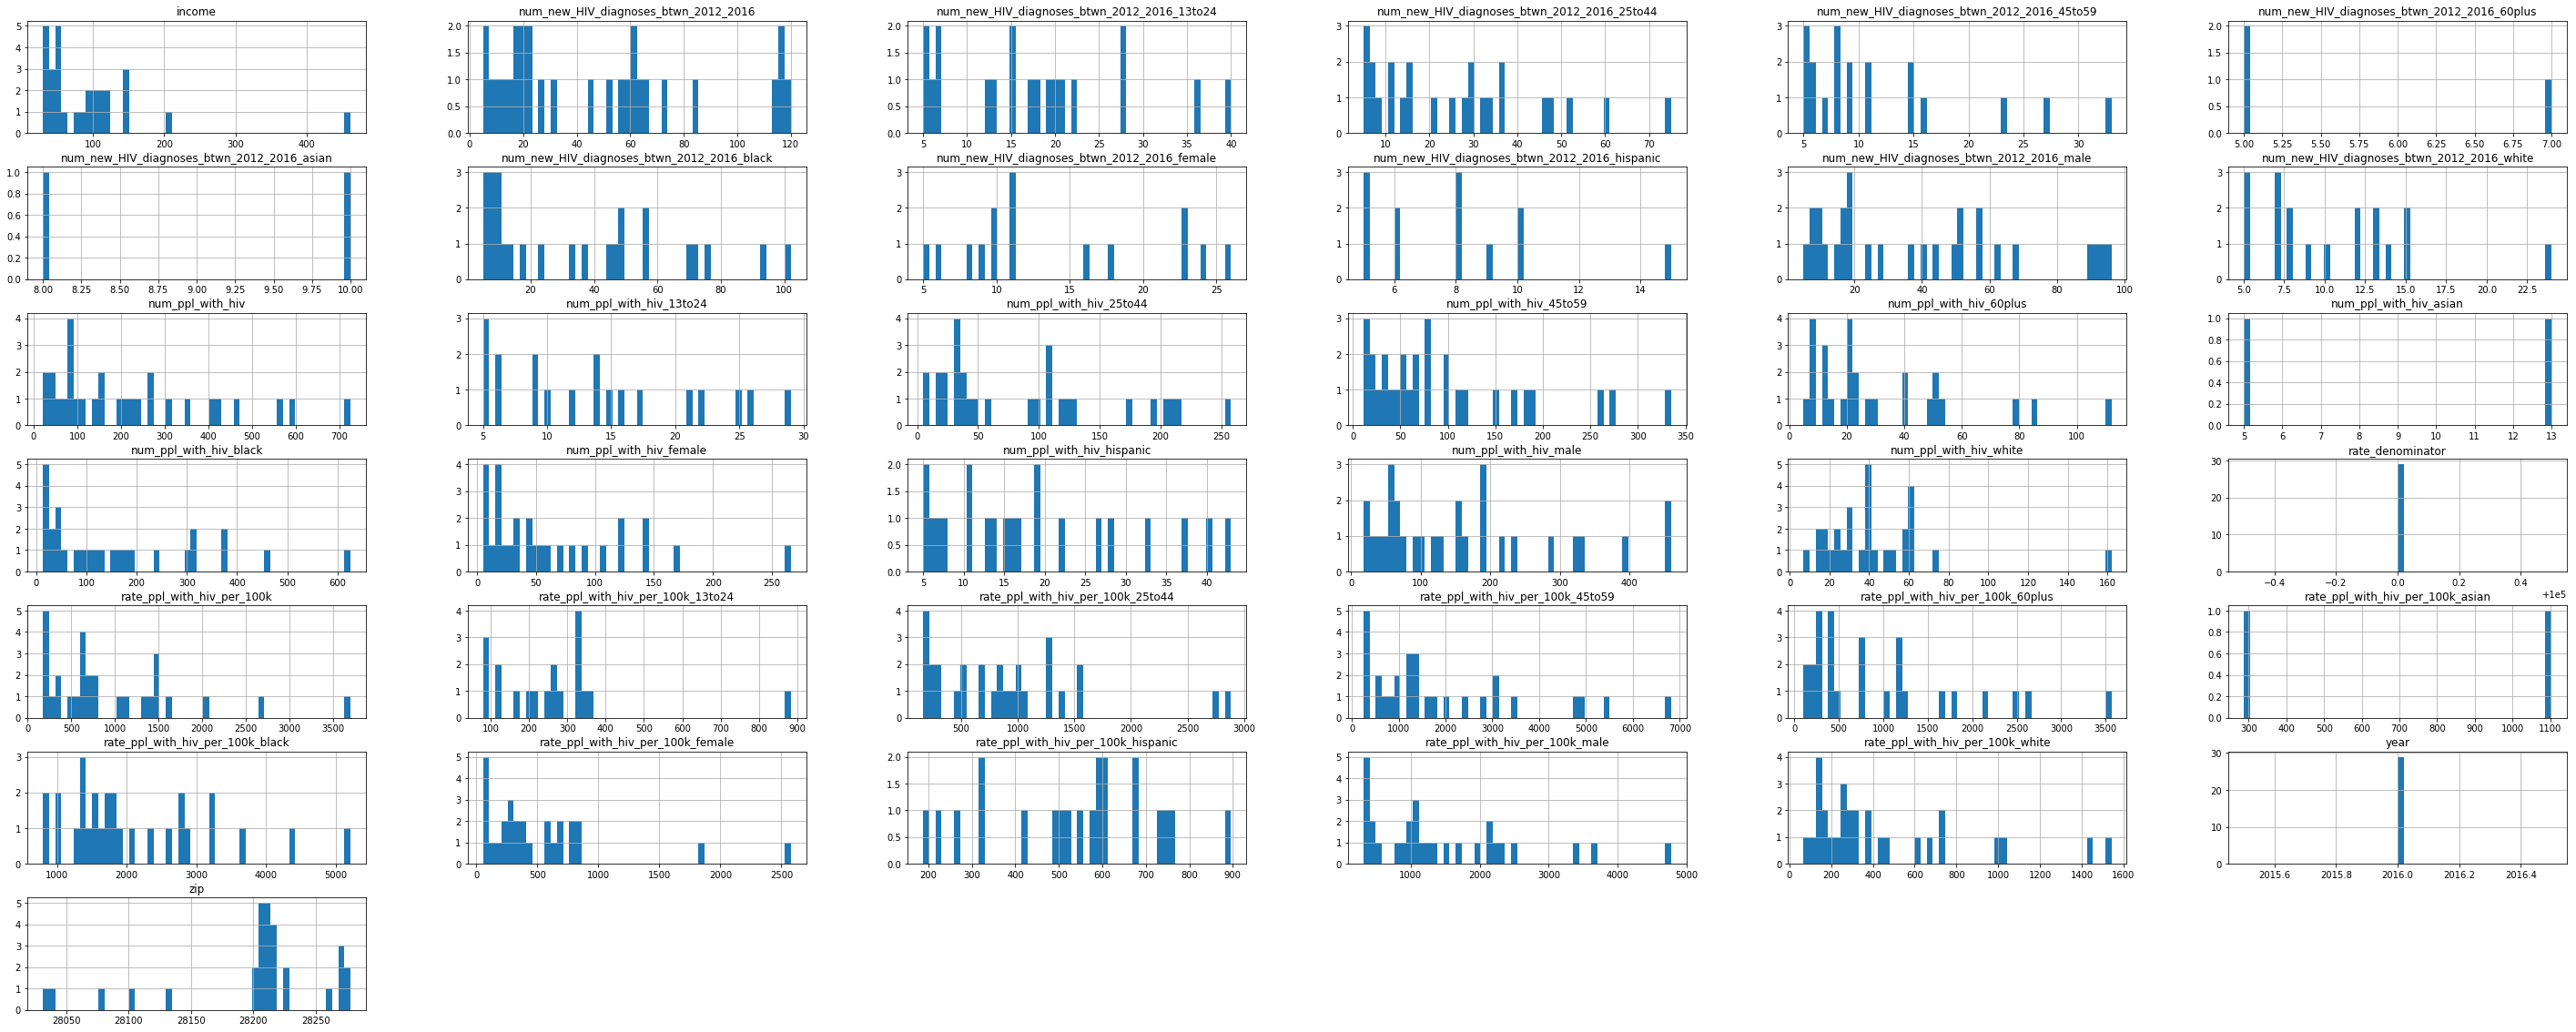

In [147]:
aids.hist(bins=50, figsize=(50,20))
plt.show()

In [148]:
aids_df = pd.DataFrame(aids)

In [149]:
#I had moved zip to be the index, so add it back as a column to work with the code below.
aids['zip'] = aids.index

In [150]:
# zips with HIV that are black above average
zips_abvavg_hiv_black = aids_df.loc[aids_df['num_ppl_with_hiv_black'] > 163.6, 'zip']
zips_abvavg_hiv_black

zip
28205    28205
28206    28206
28208    28208
28212    28212
28213    28213
28215    28215
28216    28216
28217    28217
28227    28227
28262    28262
28269    28269
Name: zip, dtype: int64

In [151]:
# zips with HIV that are male above average
zips_abvavg_hiv_male = aids_df.loc[aids_df['num_ppl_with_hiv_male'] > 128, 'zip']
zips_abvavg_hiv_male

zip
28205    28205
28206    28206
28208    28208
28210    28210
28212    28212
28213    28213
28214    28214
28215    28215
28216    28216
28217    28217
28227    28227
28262    28262
28269    28269
28273    28273
Name: zip, dtype: int64

In [152]:
# zips with new HIV cases of people aged 13 to 24 above average
zips_abvavg_newhiv_13to24 = aids_df.loc[aids_df['num_new_HIV_diagnoses_btwn_2012_2016_13to24'] > 17.578947, 'zip']
zips_abvavg_newhiv_13to24

zip
28205    28205
28208    28208
28212    28212
28214    28214
28215    28215
28216    28216
28217    28217
28262    28262
28269    28269
Name: zip, dtype: int64

In [153]:
# zips with new HIV cases of people aged 25 to 44 above average
zips_abvavg_newhiv_25to44 = aids_df.loc[aids_df['num_new_HIV_diagnoses_btwn_2012_2016_25to44'] > 26.36, 'zip']
zips_abvavg_newhiv_25to44

zip
28205    28205
28208    28208
28210    28210
28212    28212
28213    28213
28214    28214
28215    28215
28216    28216
28217    28217
28227    28227
28262    28262
28269    28269
Name: zip, dtype: int64

In [154]:
# zips with num people above 3rd quartile
zips_abvavg_hiv = aids_df.loc[aids_df['num_ppl_with_hiv'] > 306, 'zip']
zips_abvavg_hiv

zip
28205    28205
28206    28206
28208    28208
28212    28212
28215    28215
28216    28216
28269    28269
Name: zip, dtype: int64

In [155]:
aids_df.median()

num_ppl_with_hiv_13to24                              14.000000
num_ppl_with_hiv_25to44                              57.000000
num_ppl_with_hiv_45to59                              65.000000
num_ppl_with_hiv_60plus                              22.000000
num_ppl_with_hiv_asian                                9.000000
num_ppl_with_hiv_black                              110.500000
num_ppl_with_hiv                                    154.000000
num_ppl_with_hiv_female                              42.500000
num_ppl_with_hiv_hispanic                            16.000000
num_ppl_with_hiv_male                               128.000000
num_ppl_with_hiv_white                               39.000000
num_new_HIV_diagnoses_btwn_2012_2016_13to24          17.000000
num_new_HIV_diagnoses_btwn_2012_2016_25to44          25.000000
num_new_HIV_diagnoses_btwn_2012_2016_45to59           9.000000
num_new_HIV_diagnoses_btwn_2012_2016_60plus           5.000000
num_new_HIV_diagnoses_btwn_2012_2016_asian            9

In [156]:
aids_df.mean()

city                                             (3.878130239e-314+4.170819314e-314j)
num_ppl_with_hiv_13to24                                                       (14+0j)
num_ppl_with_hiv_25to44                                        (89.62068965517241+0j)
num_ppl_with_hiv_45to59                                        (95.62068965517241+0j)
num_ppl_with_hiv_60plus                                       (31.629629629629626+0j)
num_ppl_with_hiv_asian                                                         (9+0j)
num_ppl_with_hiv_black                                        (163.57142857142856+0j)
num_ppl_with_hiv                                              (224.72413793103448+0j)
num_ppl_with_hiv_female                                                    (63.75+0j)
num_ppl_with_hiv_hispanic                                     (18.857142857142858+0j)
num_ppl_with_hiv_male                                         (163.06896551724137+0j)
num_ppl_with_hiv_white                                

In [157]:
zips_abvavg_hiv_black.isin(aids_df['zip'])

zip
28205    True
28206    True
28208    True
28212    True
28213    True
28215    True
28216    True
28217    True
28227    True
28262    True
28269    True
Name: zip, dtype: bool

In [158]:
problemzips_df = pd.DataFrame(zips_abvavg_hiv_black, zips_abvavg_newhiv_13to24, zips_abvavg_hiv_male)

In [159]:
problemzips_df1 = pd.DataFrame(
    {'zipsabvavgblack': zips_abvavg_hiv_black,
     'zipsabvavgmale': zips_abvavg_hiv_male,
     'zipsabvavg13to24': zips_abvavg_newhiv_13to24,
    'zipsabvavg25to44': zips_abvavg_newhiv_25to44,
    'zipsabvavghiv': zips_abvavg_hiv})

In [160]:
problemzips_df1

,zipsabvavgblack,zipsabvavgmale,zipsabvavg13to24,zipsabvavg25to44,zipsabvavghiv
zip,,,,,
28205,28205.0,28205,28205.0,28205.0,28205.0
28206,28206.0,28206,NaN,NaN,28206.0
28208,28208.0,28208,28208.0,28208.0,28208.0
28210,NaN,28210,NaN,28210.0,NaN
28212,28212.0,28212,28212.0,28212.0,28212.0
28213,28213.0,28213,NaN,28213.0,NaN
28214,NaN,28214,28214.0,28214.0,NaN
28215,28215.0,28215,28215.0,28215.0,28215.0
28216,28216.0,28216,28216.0,28216.0,28216.0


In [161]:
#dataframeX = pd.read_csv("ftp://hack01.northstate.net/hackathon/health_outcomes/500-cities/bsv/500_Cities_2016_CLT.bsv", sep="|", header=0)

In [162]:
#dataframeX

In [163]:
#dataframeX.describe()

In [164]:
#dataframeX.info()

In [165]:
#predictions = ['1', '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
predictions = ['0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0' ]

In [166]:
aids_df['Prediction'] = predictions

In [167]:
aids_df

,city,num_ppl_with_hiv_13to24,num_ppl_with_hiv_25to44,num_ppl_with_hiv_45to59,num_ppl_with_hiv_60plus,num_ppl_with_hiv_asian,num_ppl_with_hiv_black,num_ppl_with_hiv,num_ppl_with_hiv_female,num_ppl_with_hiv_hispanic,...,rate_ppl_with_hiv_per_100k,rate_denominator,year,rate_ppl_with_hiv_per_100k_female,rate_ppl_with_hiv_per_100k_hispanic,rate_ppl_with_hiv_per_100k_male,rate_ppl_with_hiv_per_100k_white,income,zip,Prediction
zip,,,,,,,,,,,,,,,,,,,,,
28031,Charlotte,NaN,18,18,8.0,NaN,17.0,45,7.0,NaN,...,224,100000,2016,68.0,NaN,389,138,143.644289,28031,0
28036,Charlotte,NaN,10,11,NaN,NaN,13.0,21,NaN,NaN,...,175,100000,2016,NaN,NaN,312,68,147.729280,28036,0
28078,Charlotte,NaN,32,33,9.0,NaN,32.0,78,16.0,5.0,...,192,100000,2016,76.0,188.0,315,121,94.881625,28078,0
28105,Charlotte,5.0,34,51,13.0,NaN,41.0,103,32.0,13.0,...,316,100000,2016,185.0,579.0,464,159,76.824331,28105,0
28134,Charlotte,NaN,21,16,5.0,NaN,25.0,43,10.0,NaN,...,552,100000,2016,236.0,NaN,930,301,56.958288,28134,0
28202,Charlotte,10.0,57,65,22.0,NaN,90.0,154,26.0,NaN,...,1456,100000,2016,576.0,NaN,2113,679,104.450459,28202,0
28203,Charlotte,NaN,48,65,23.0,NaN,99.0,140,42.0,NaN,...,1445,100000,2016,837.0,NaN,2098,438,112.341010,28203,0
28204,Charlotte,NaN,33,39,12.0,NaN,54.0,85,17.0,NaN,...,2024,100000,2016,766.0,NaN,3431,997,96.083333,28204,0
28205,Charlotte,22.0,216,271,86.0,5.0,370.0,595,143.0,43.0,...,1648,100000,2016,796.0,671.0,2494,1035,54.620088,28205,1


In [168]:
drop_city_aids_df = aids_df.drop(['city', 'num_ppl_with_hiv_asian', 'num_new_HIV_diagnoses_btwn_2012_2016_60plus', 'num_new_HIV_diagnoses_btwn_2012_2016_asian', 'num_new_HIV_diagnoses_btwn_2012_2016_female', 'num_new_HIV_diagnoses_btwn_2012_2016_hispanic', 'rate_ppl_with_hiv_per_100k_asian', 'rate_denominator', 'year'], axis=1)
drop_city_aids_df

,num_ppl_with_hiv_13to24,num_ppl_with_hiv_25to44,num_ppl_with_hiv_45to59,num_ppl_with_hiv_60plus,num_ppl_with_hiv_black,num_ppl_with_hiv,num_ppl_with_hiv_female,num_ppl_with_hiv_hispanic,num_ppl_with_hiv_male,num_ppl_with_hiv_white,...,rate_ppl_with_hiv_per_100k_60plus,rate_ppl_with_hiv_per_100k_black,rate_ppl_with_hiv_per_100k,rate_ppl_with_hiv_per_100k_female,rate_ppl_with_hiv_per_100k_hispanic,rate_ppl_with_hiv_per_100k_male,rate_ppl_with_hiv_per_100k_white,income,zip,Prediction
zip,,,,,,,,,,,,,,,,,,,,,
28031,NaN,18,18,8.0,17.0,45,7.0,NaN,38,24,...,205.0,1502.0,224,68.0,NaN,389,138,143.644289,28031,0
28036,NaN,10,11,NaN,13.0,21,NaN,NaN,18,7,...,NaN,1648.0,175,NaN,NaN,312,68,147.729280,28036,0
28078,NaN,32,33,9.0,32.0,78,16.0,5.0,62,39,...,155.0,808.0,192,76.0,188.0,315,121,94.881625,28078,0
28105,5.0,34,51,13.0,41.0,103,32.0,13.0,71,39,...,189.0,1053.0,316,185.0,579.0,464,159,76.824331,28105,0
28134,NaN,21,16,5.0,25.0,43,10.0,NaN,33,14,...,310.0,1806.0,552,236.0,NaN,930,301,56.958288,28134,0
28202,10.0,57,65,22.0,90.0,154,26.0,NaN,128,43,...,2632.0,2793.0,1456,576.0,NaN,2113,679,104.450459,28202,0
28203,NaN,48,65,23.0,99.0,140,42.0,NaN,98,28,...,1820.0,3667.0,1445,837.0,NaN,2098,438,112.341010,28203,0
28204,NaN,33,39,12.0,54.0,85,17.0,NaN,68,29,...,2139.0,5217.0,2024,766.0,NaN,3431,997,96.083333,28204,0
28205,22.0,216,271,86.0,370.0,595,143.0,43.0,452,162,...,1690.0,3203.0,1648,796.0,671.0,2494,1035,54.620088,28205,1


In [169]:
drop_nan_df = drop_city_aids_df.fillna(drop_city_aids_df.mean())

In [170]:
drop_city_aids_df.mean

<bound method DataFrame.mean of        num_ppl_with_hiv_13to24  num_ppl_with_hiv_25to44  \
zip                                                       
28031                      NaN                       18   
28036                      NaN                       10   
28078                      NaN                       32   
28105                      5.0                       34   
28134                      NaN                       21   
28202                     10.0                       57   
28203                      NaN                       48   
28204                      NaN                       33   
28205                     22.0                      216   
28206                     17.0                      101   
28207                      NaN                        5   
28208                     21.0                      258   
28209                      6.0                       38   
28210                      5.0                      123   
28211                   

In [171]:
X = drop_nan_df.iloc[:, 0:-1].values  
y = drop_nan_df.iloc[:, -1].values 

In [172]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [173]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

In [174]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=6, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)  

In [175]:
regressor.fit(X_test, y_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=6, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [176]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))  

[[5 0]
 [0 1]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         5
          1       1.00      1.00      1.00         1

avg / total       1.00      1.00      1.00         6

1.0
